In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
%matplotlib inline

# Data COVID-19 per Provinsi di Indonesia

Data yang disajikan bersifat deskriptif. Tidak ada prediksi/projeksi berbasis model ilmiah karena penyaji bukan merupakan epidemiolog.

Saat ini baru data <strong>Jawa Timur</strong> yang terkompilasikan.

# Aceh

# Sumatra Utara

# Sumatra Barat

# Riau

# Jambi

# Sumatra Selatan

# Bengkulu

# Lampung

# Kepulauan Riau

# Kepulauan Belitung

# Banten

# DKI Jakarta

# Jawa Barat

# Jawa Tengah

# Yogyakarta

# Jawa Timur

Sumber data: https://covid19dev.jatimprov.go.id/xweb/draxi

In [2]:
def get_latest_data():
    df = pd.read_csv('./data/covid-jatim.csv')
    
    # get latest data
    to_date = lambda x: x['updated_at'][:10]
    df['updated_date'] = df.apply(to_date, axis=1)
    df = df[df['updated_date'] == df.updated_date.max()]
    df = df.reset_index(drop=True)
    
    return df

In [3]:
print(f'Data terakhir diperbarui pada: {get_latest_data().updated_at.max()}')

Data terakhir diperbarui pada: 2020-04-12 16:32:21


## Tren COVID-19 per Kabupaten

Berikut adalah tren COVID-19 yang diukur:
- orang dengan risiko (ODR)
- orang tanpa gejala (OTG),
- orang dengan pengawasan (ODP),
- pasien dengan pengawasan (PDP),
- terkonfirmasi COVID-19,
- sembuh dari COVID-19,
- meninggal akibat COVID-19

Catatan:
- data tren COVID-19 seluruh kabupaten di Jawa Timur dapat diperoleh, namun yang ditampilkan hanya 10 kabupaten dengan jumlah terbanyak per data terakhir diperbarui. Hal ini untuk mengurangi ketidakjelasan saat melihat grafik dan pembaca dapat fokus pada kabupaten-kabupaten dengan jumlah terbanyak.
- tekan tanda panah atau scroll ke bawah untuk melihat sub-poin dari peta persebaran.

In [4]:
def get_top_ten(measurement):
    df = get_latest_data()
    df = df[['kabko', measurement]]
    df = df.sort_values(by=measurement, ascending=False)[:10]
    kab = list(df['kabko'])
    
    return kab

def get_trendline(measurement, title):
    df = pd.read_csv('./data/covid-jatim.csv')
    df = df[['updated_at', 'kabko', measurement]]
    to_date = lambda x: x[:10]
    df['updated_date'] = df['updated_at'].apply(to_date)
    df = df.drop(columns=['updated_at']).reset_index(drop=True)
    df = df.loc[df['kabko'].isin(get_top_ten(measurement))]
    df = df.pivot_table(index='updated_date', columns='kabko', values=measurement)
    ax = df.plot(figsize=(20, 7.5))
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Waktu", fontsize=15)
    ax.set_ylabel("Jumlah Orang", fontsize=15)
    ax.legend(title='Kabupaten')

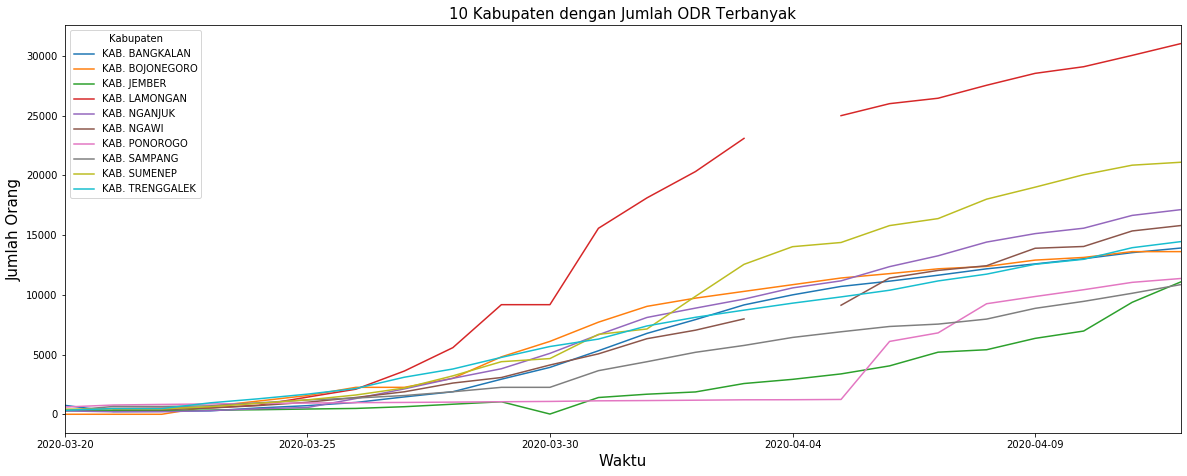

In [5]:
get_trendline('odr', '10 Kabupaten dengan Jumlah ODR Terbanyak')

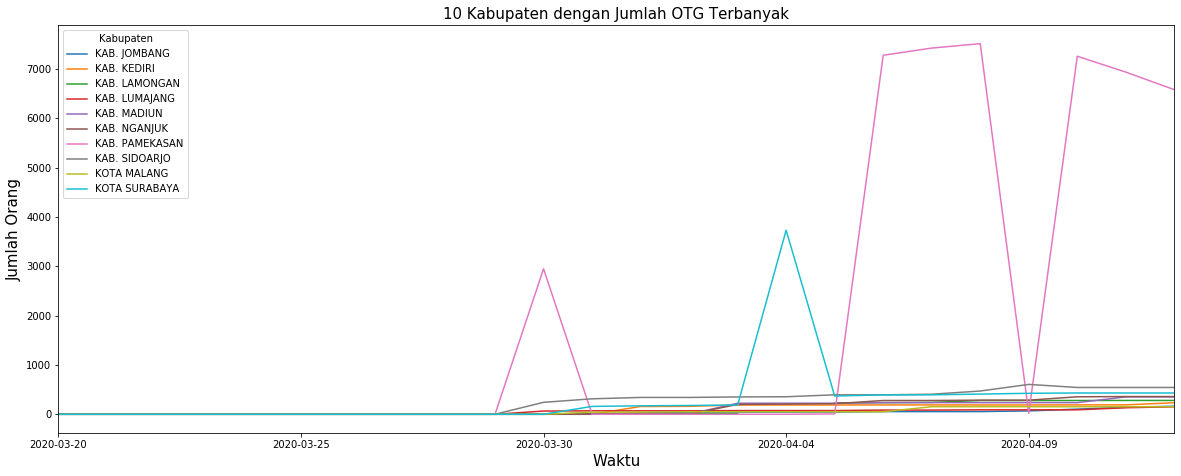

In [6]:
get_trendline('otg', '10 Kabupaten dengan Jumlah OTG Terbanyak')

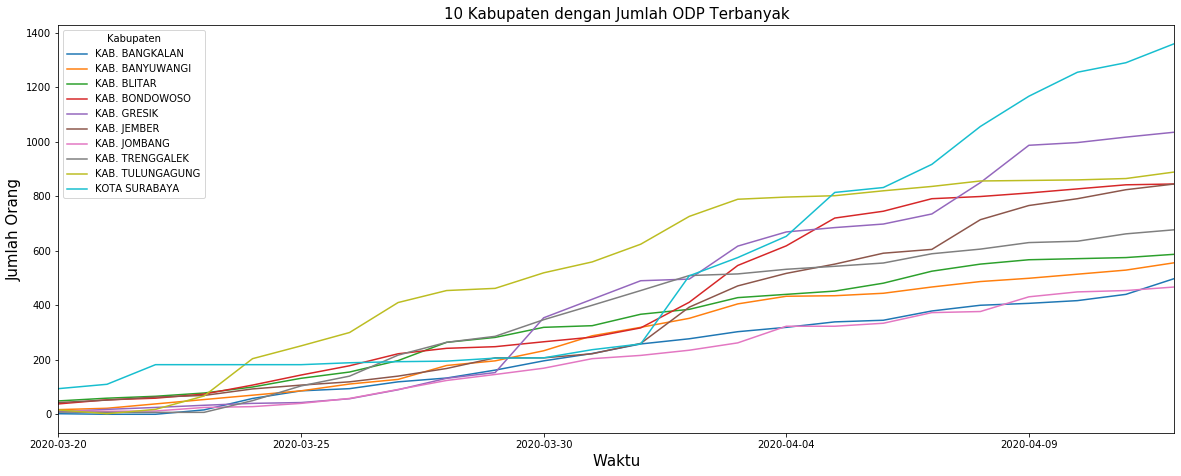

In [7]:
get_trendline('odp', '10 Kabupaten dengan Jumlah ODP Terbanyak')

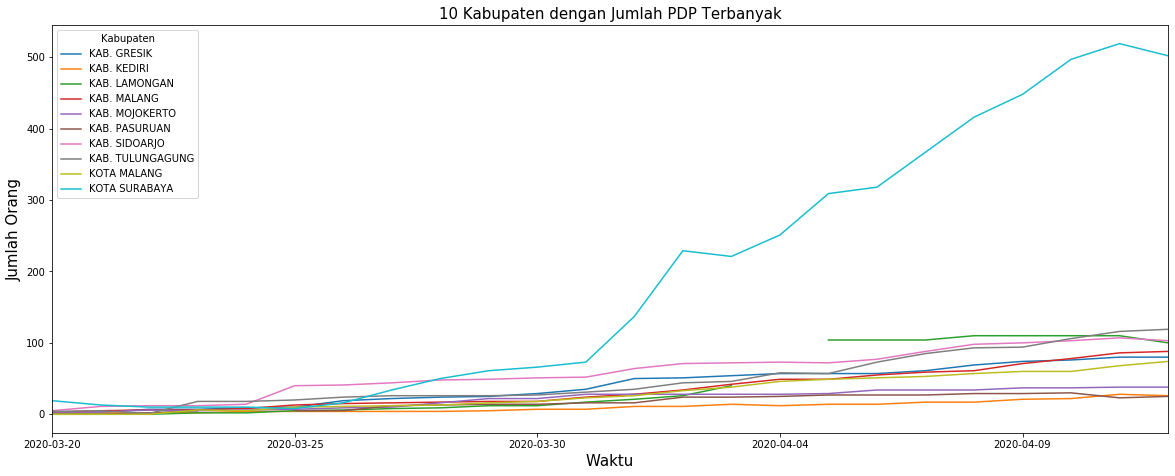

In [8]:
get_trendline('pdp', '10 Kabupaten dengan Jumlah PDP Terbanyak')

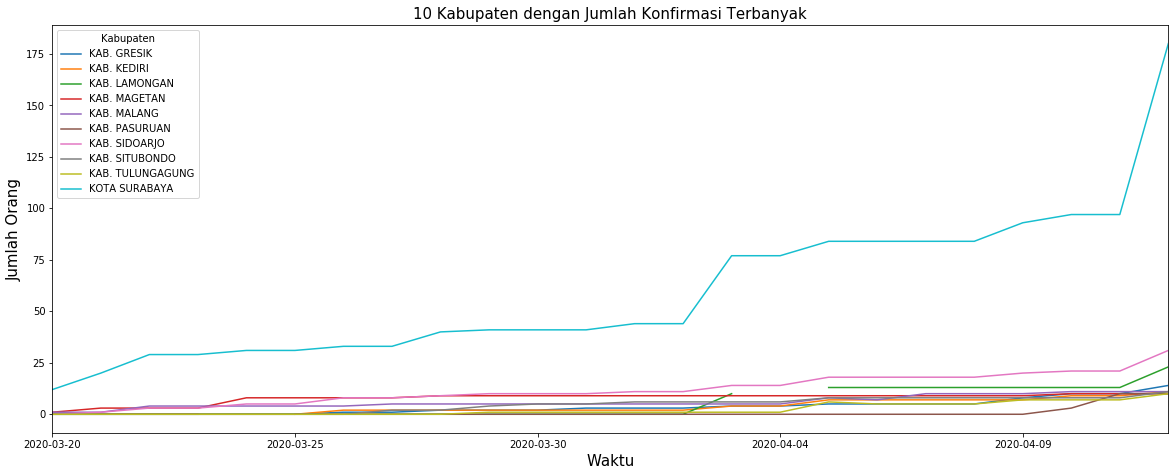

In [9]:
get_trendline('confirm', '10 Kabupaten dengan Jumlah Konfirmasi Terbanyak')

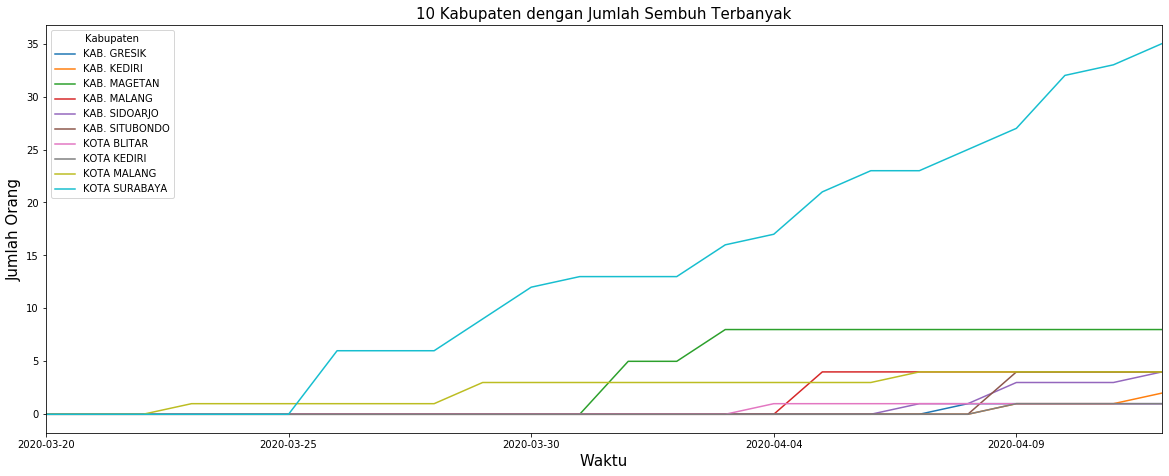

In [10]:
get_trendline('sembuh', '10 Kabupaten dengan Jumlah Sembuh Terbanyak')

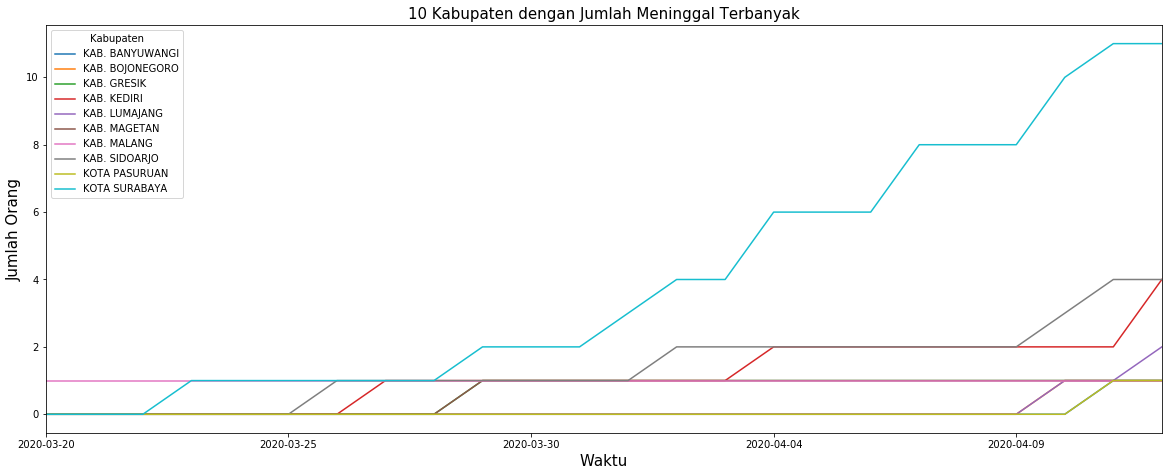

In [11]:
get_trendline('meninggal', '10 Kabupaten dengan Jumlah Meninggal Terbanyak')

## Peringkat Terbanyak

Berikut adalah 10 kabupaten dengan informasi berikut:
- orang dengan risiko (ODR)
- orang tanpa gejala (OTG),
- orang dengan pengawasan (ODP),
- pasien dengan pengawasan (PDP),
- terkonfirmasi COVID-19,
- sembuh dari COVID-19,
- meninggal akibat COVID-19

Catatan:
- tekan tanda panah atau scroll ke bawah untuk melihat sub-poin dari peringkat terbanyak.

In [12]:
def rank_bar(bar, title):
    df = get_latest_data()
    df = df[['kabko', bar]]
    df = df.sort_values(by=bar, ascending=False)[:10]
    ax = df.plot(
        kind='bar',
        x='kabko',
        figsize=(15, 7.5),
        legend=False,
        title=title
    )
    ax.set_title(title, fontsize=15)
    ax.set_xlabel("Kabupaten", fontsize=15)
    ax.set_ylabel("Jumlah Orang", fontsize=15)

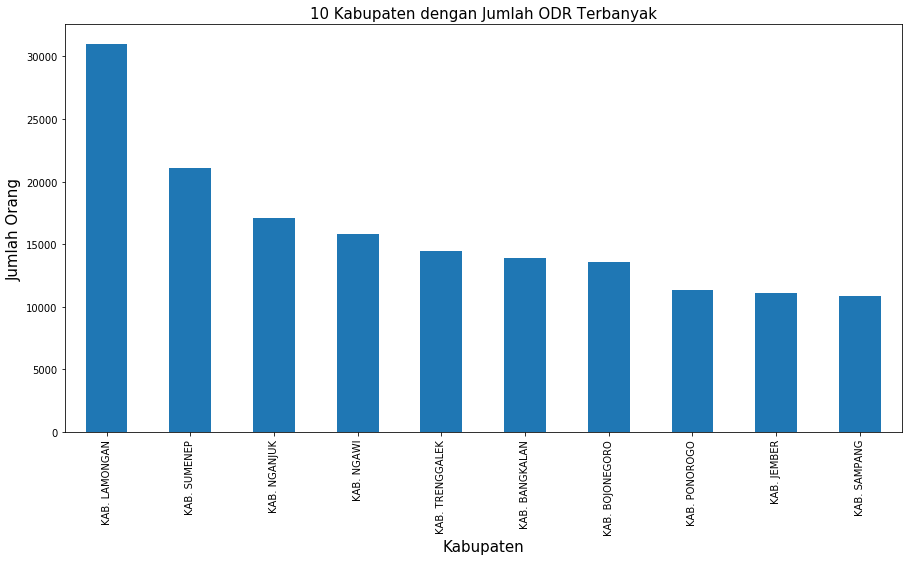

In [13]:
rank_bar('odr', '10 Kabupaten dengan Jumlah ODR Terbanyak')

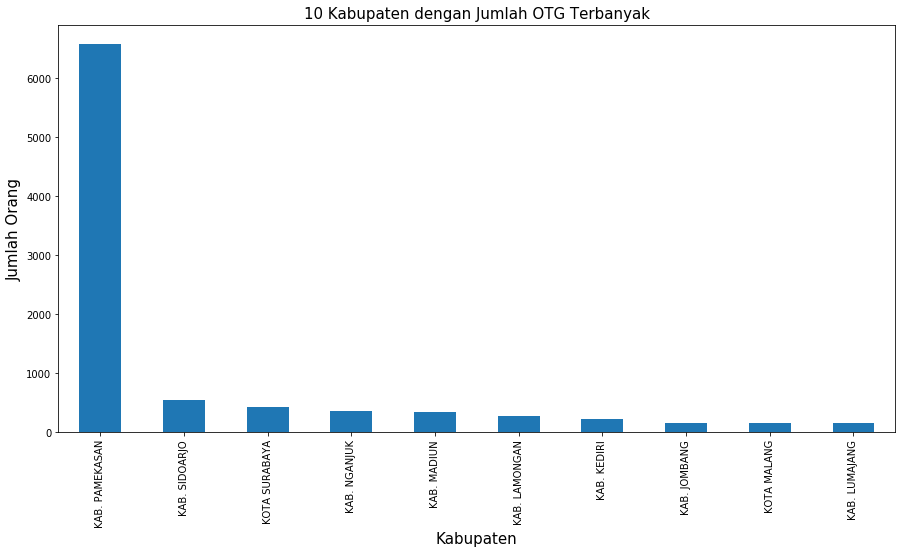

In [14]:
rank_bar('otg', '10 Kabupaten dengan Jumlah OTG Terbanyak')

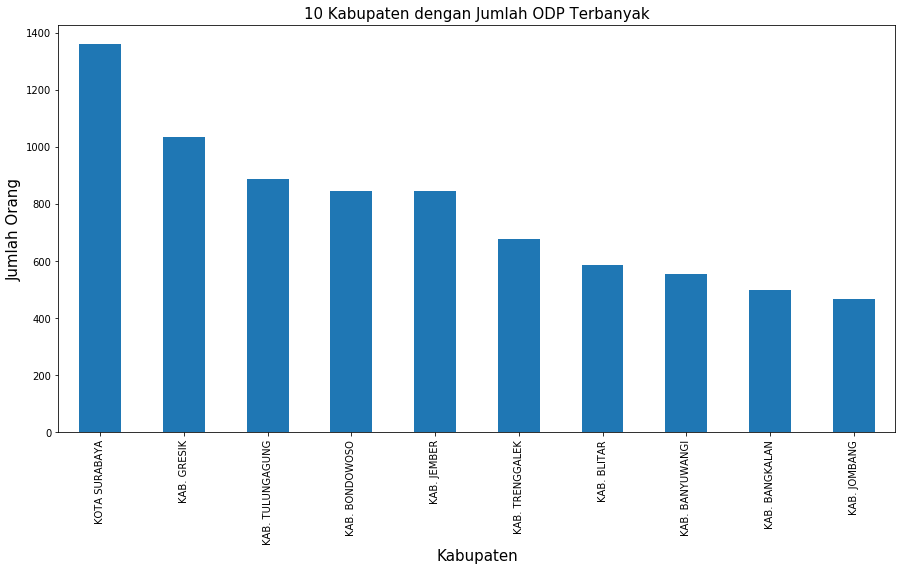

In [15]:
rank_bar('odp', '10 Kabupaten dengan Jumlah ODP Terbanyak')

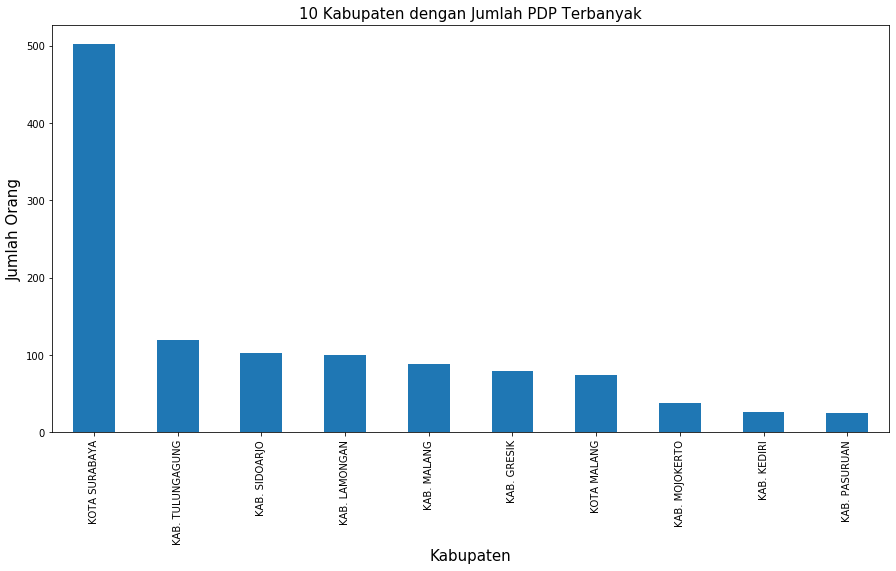

In [16]:
rank_bar('pdp', '10 Kabupaten dengan Jumlah PDP Terbanyak')

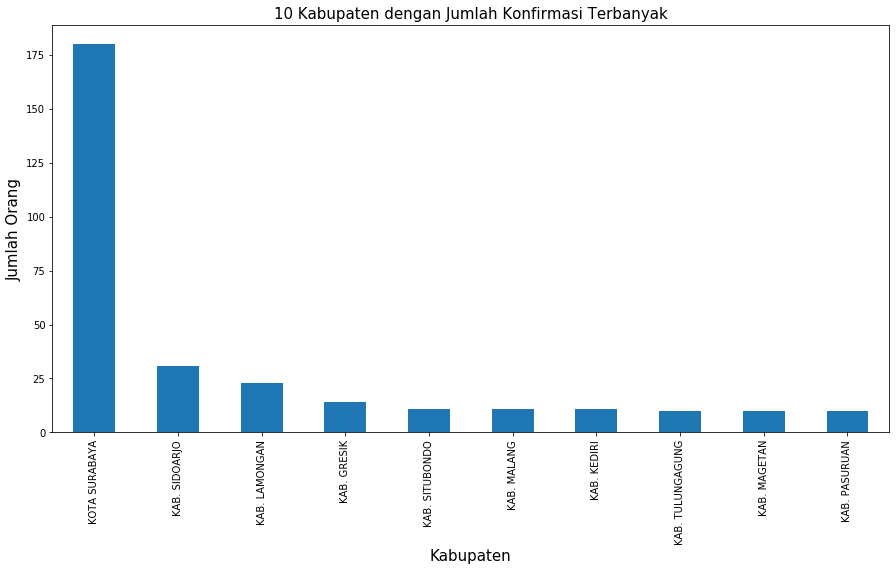

In [17]:
rank_bar('confirm', '10 Kabupaten dengan Jumlah Konfirmasi Terbanyak')

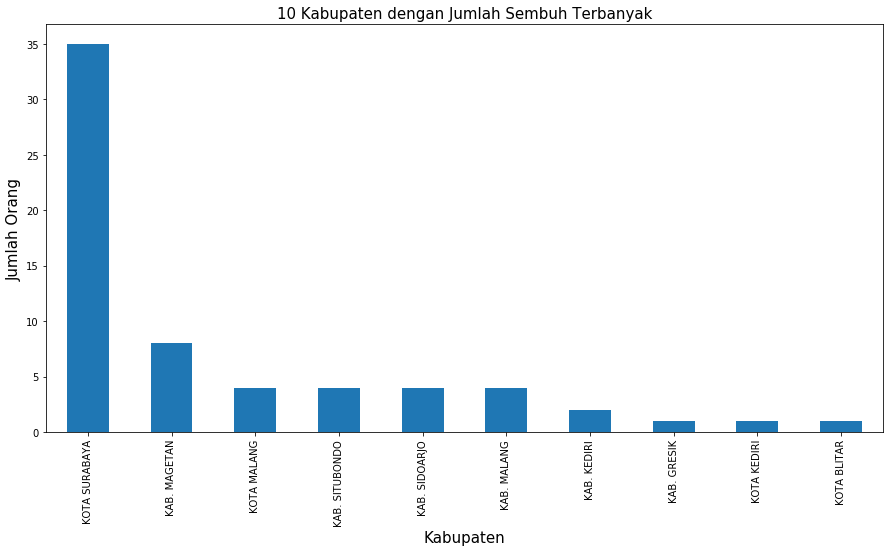

In [18]:
rank_bar('sembuh', '10 Kabupaten dengan Jumlah Sembuh Terbanyak')

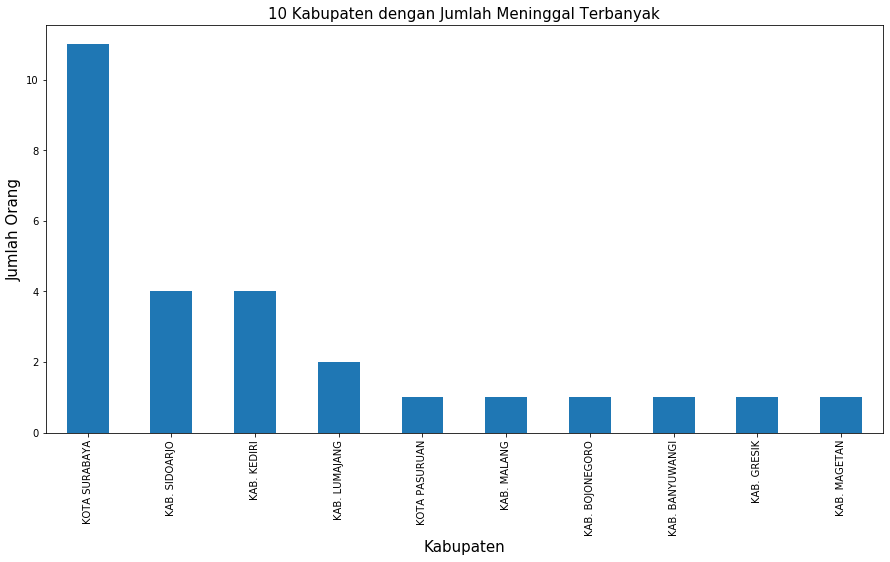

In [19]:
rank_bar('meninggal', '10 Kabupaten dengan Jumlah Meninggal Terbanyak')

## Peta Persebaran

Berikut adalah peta persebaran:
- orang dengan risiko (ODR)
- orang tanpa gejala (OTG),
- orang dengan pengawasan (ODP),
- pasien dengan pengawasan (PDP),
- terkonfirmasi COVID-19,
- sembuh dari COVID-19,
- meninggal akibat COVID-19

Catatan:
- semakin besar gelembung menunjukkan semakin banyak jumlah orang yang dimaksud pada poin-poin di atas.
- besaran gelembung hanya bisa dibandingkan per objek yang diukur. misalnya, besaran gelembung ODP tidak bisa dibandingkan dengan besaran gelembung konfirmasi.
- tekan tanda panah atau scroll ke bawah untuk melihat sub-poin dari peta persebaran.

In [20]:
def plot_map(bubble, multiplier, title):
    
    df = get_latest_data()
    
    # get base image
    BBox = ((110.750, 114.500, -8.700, -6.700))
    jatim = plt.imread('./assets/jawa-timur.png')
    fig, ax = plt.subplots(figsize = (15, 10))
    ax.scatter(df.lon, df.lat, s=df[bubble] * multiplier, alpha=0.5)
    ax.set_title(title, fontsize=15)
    ax.imshow(jatim, zorder = 0, extent = BBox)

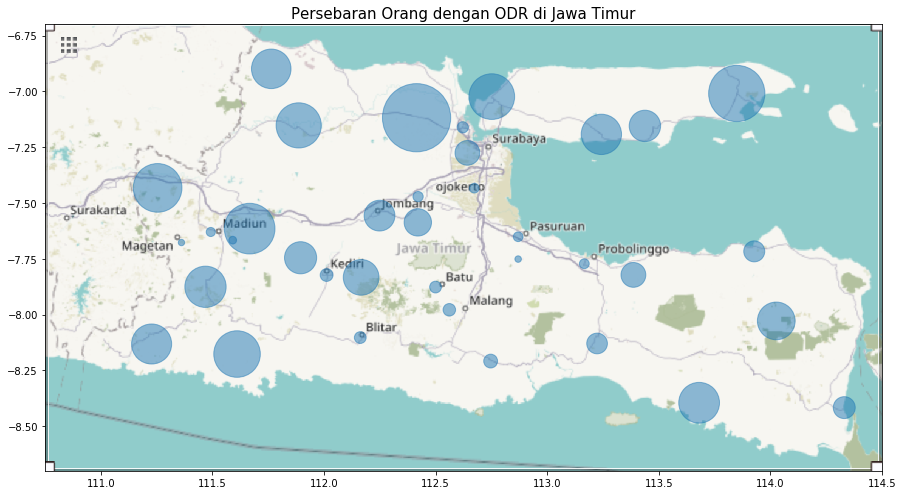

In [21]:
plot_map('odr', 0.15, 'Persebaran Orang dengan ODR di Jawa Timur')

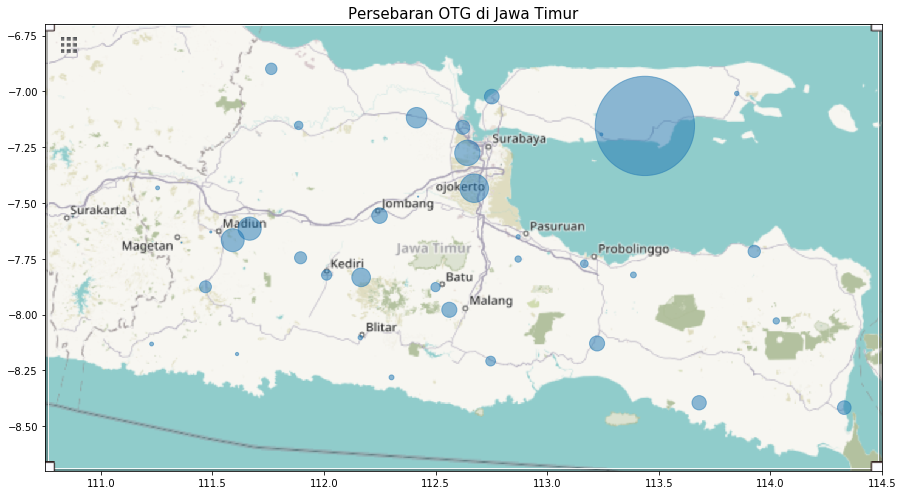

In [22]:
plot_map('otg', 1.5, 'Persebaran OTG di Jawa Timur')

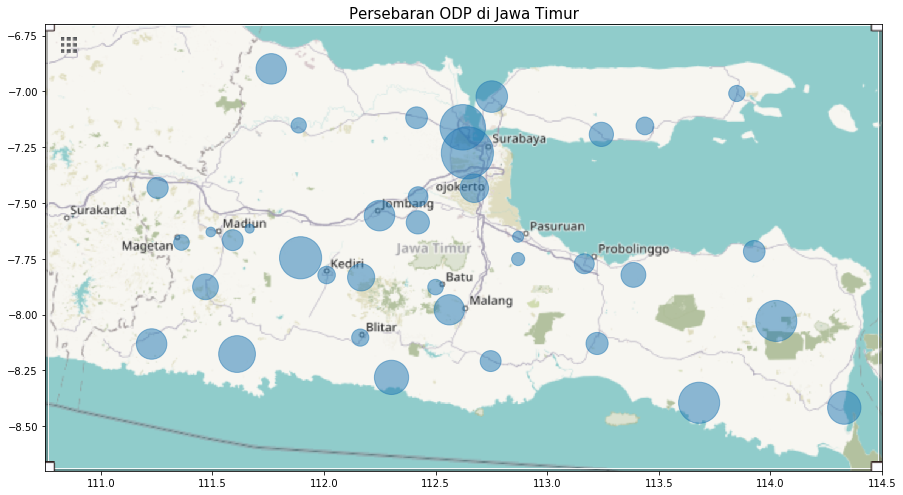

In [23]:
plot_map('odp', 2, 'Persebaran ODP di Jawa Timur')

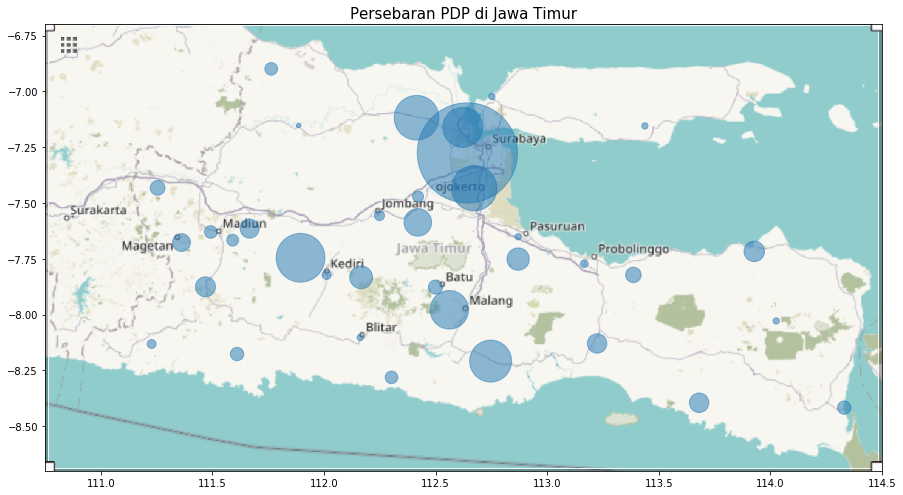

In [24]:
plot_map('pdp', 20, 'Persebaran PDP di Jawa Timur')

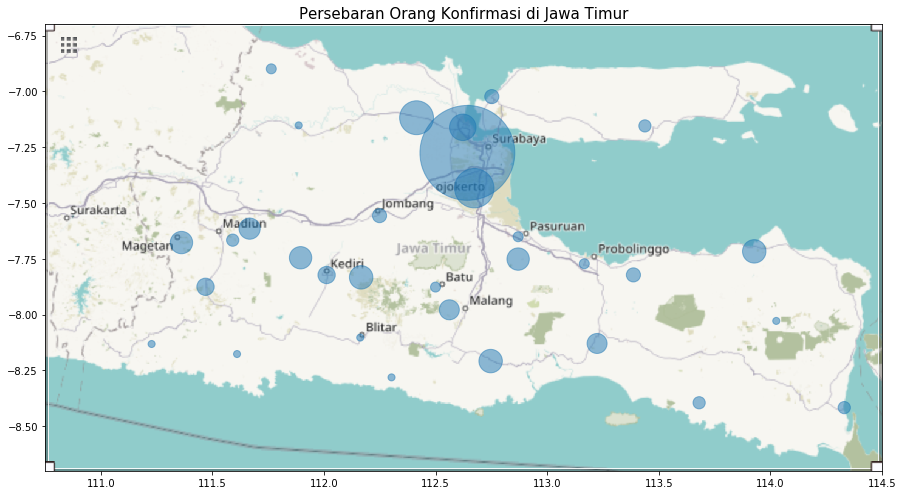

In [25]:
plot_map('confirm', 50, 'Persebaran Orang Konfirmasi di Jawa Timur')

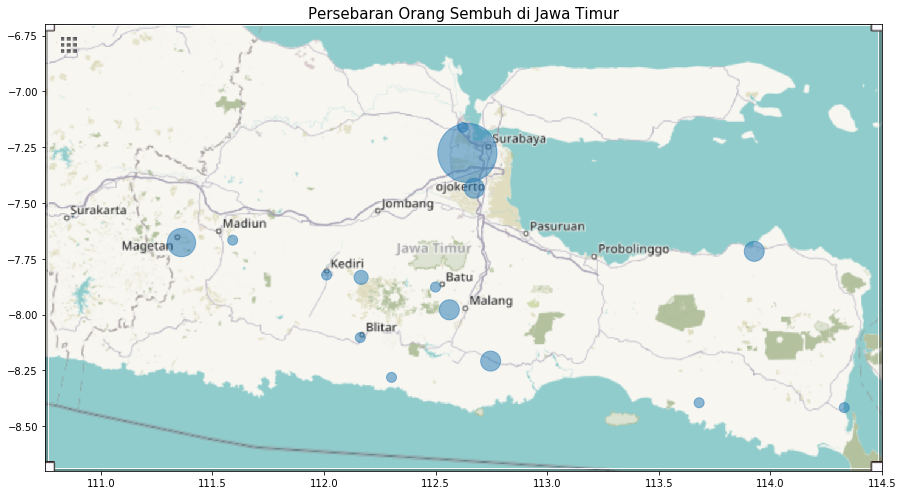

In [26]:
plot_map('sembuh', 100, 'Persebaran Orang Sembuh di Jawa Timur')

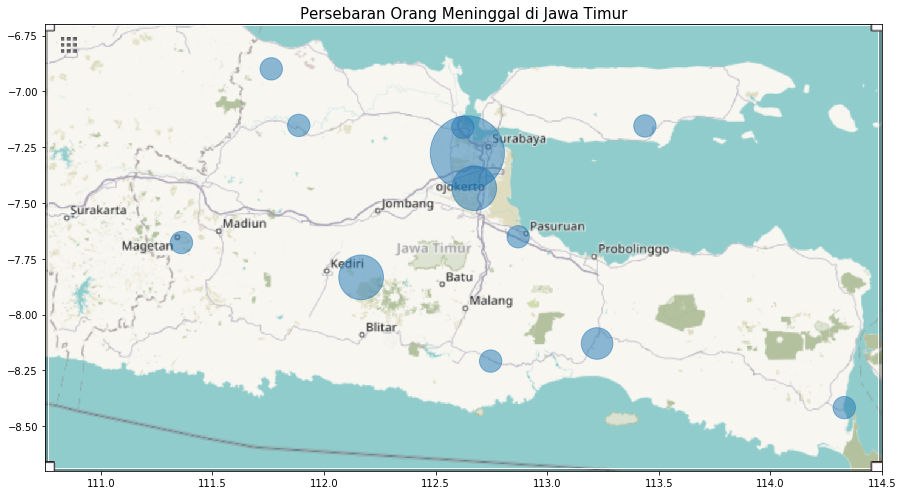

In [27]:
plot_map('meninggal', 500, 'Persebaran Orang Meninggal di Jawa Timur')

# Kalimantan Barat

# Kalimantan Tengah

# Kalimantan Selatan

# Kalimantan Timur

# Kalimantan Utara

# Bali

# Nusa Tenggara Barat

# Nusa Tenggara Timur

# Sulawesi Utara

# Gorontalo

# Sulawesi Tengah

# Sulawesi Barat

# Sulawesi Selatan

# Sulawesi Tenggara

# Maluku Utara

# Maluku

# Papua Barat

# Papua